File exists! Proceeding with analysis...
5777100
[ 0.          0.00763359  0.01526718 ... -0.02290076 -0.01526718
 -0.00763359]
441.03053435114504
[-1.03053435e+00 -1.02290076e+00 -1.01526718e+00 ...  2.20489466e+04
  2.20489542e+04  2.20489618e+04]
[ -441.03053435  -441.02290076  -441.01526718 ... 21608.94656489
 21608.95419847 21608.96183206]
57775
305.68192
[6.17039390e-03 6.17011357e-03 6.16927538e-03 ... 1.13139604e-05
 1.13146325e-05 1.13150345e-05]


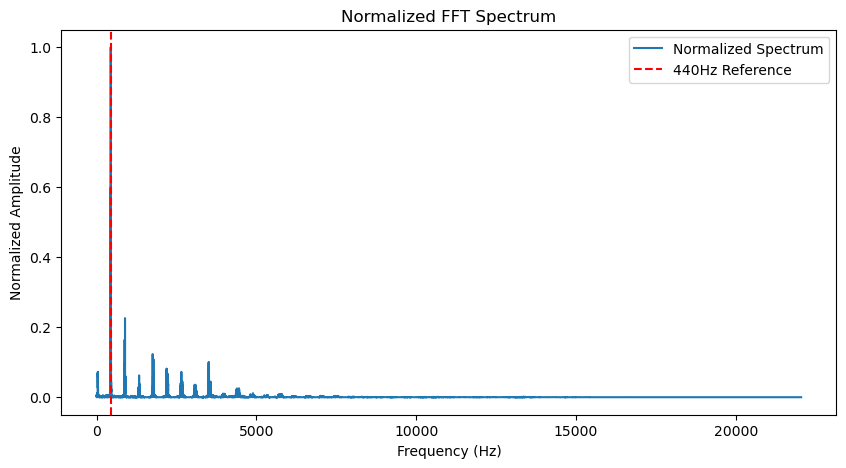

Detected Fundamental Frequency: 22049.992366412214 Hz


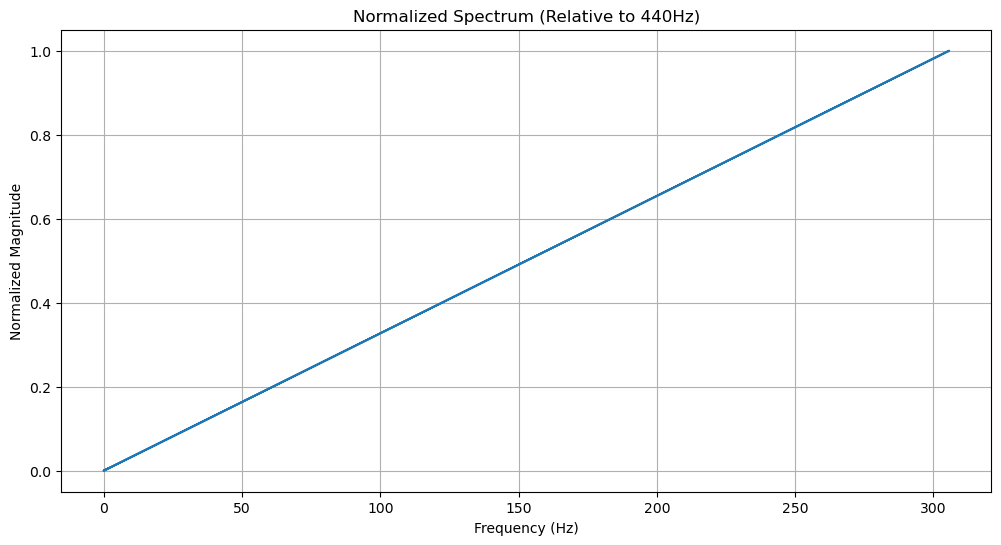

In [26]:
!pip install scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.io.wavfile as wav
import os

# Specify the path to your audio file
sound_data = "./sound_data/Violin A-violin.wav"  # Assuming the file is in the 'sound_data' folder in the current directory

# Check if the file exists
if not os.path.exists(sound_data):
    print(f"Error, {sound_data} doesn't exist")
else:
    print("File exists! Proceeding with analysis...")

# Read the audio file
sample_rate, data = wav.read(sound_data)

data = data[:,0]     # Slice away 1 channel because there are usually 2 channels (cos 2 ears)
### Fourier Transform the file
# FT the audio file, where y is amplitude and x is Hz 
fft_data = np.fft.fft(data)
print(len(data))
# Getting y values and making y axis
# FT produces positive complex numbers, we want to remove them, do this through modulus
amplitude = np.abs(fft_data)
# Getting x values and making x axis
frequencies = np.fft.fftfreq(len(data), d=1/sample_rate)
print(frequencies)
# Sorting x values: FT produces both negative and positive x values, we want to remove the negative x values
positive_freq = frequencies[:len(frequencies)//2]
# Corresponding amplitude positive frequencies
positive_ampl = amplitude[:len(amplitude)//2]
### Finding the Fundamental Frequency through Normalising 
# Index of the fundamental frequency (same as peak amplitude)

fundamental_index = np.argmax(positive_ampl)
fundamental_freq = positive_freq[fundamental_index]

print(fundamental_freq)
# Normalise frequency (x axis) -> shift frequencies so that A sharp fundamental aligns with 440 Hz
freq_shift = fundamental_freq - 440  # Difference between A sharp fundamental freq & 440 
norm_freqs = positive_freq - freq_shift # Shifting everything in A sharp

print(norm_freqs)
# Normalise amplitude (y axis)

# Get amplitude at 440Hz

# What is the index that is closest to 440Hz (need to do this because 440Hz might not exist inside this spectrum)
print(norm_freqs - 440)                               # array of how far each bin is away from 440hz
np.abs(norm_freqs - 440)                              # we only want absolute positive values 
index_440Hz = np.argmin(np.abs(norm_freqs - 440))     # arg min helps us find which positive value is the smallest                                 

print(index_440Hz)

ampl_at_440Hz = positive_ampl[index_440Hz]   

print(ampl_at_440Hz)

# Normalize amplitude
norm_ampl = positive_ampl / ampl_at_440Hz

print(norm_ampl)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(norm_freqs, norm_ampl, label="Normalized Spectrum")
plt.axvline(440, color='r', linestyle='--', label="440Hz Reference")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Amplitude")
plt.title("Normalized FFT Spectrum")
plt.legend()
plt.show()


### Testing and wrong, ignore
# Find the peak frequency (fundamental frequency)

# Find the index of the maximum amplitude (peak)
fundamental_idx = np.argmax(positive_freq)
fundamental_freq = positive_freq[fundamental_idx]

print(f"Detected Fundamental Frequency: {fundamental_freq} Hz")
# Getting relevant amplitude at 440Hz

ampl_440Hz = positive_ampl[index_440Hz]
# Normalising the amplitude, taking whole spectrum divide by amplitude at fundamental 

normalised_ampl = positive_ampl / ampl_440Hz
plt.figure(figsize=(12, 6))
plt.plot(positive_ampl, normalised_ampl)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Magnitude")
plt.title("Normalized Spectrum (Relative to 440Hz)")
plt.grid()
plt.show()